# ⚯ Pair Programming 3.1 - Hypothesis Testing

In this exercise, you will have the opportunity to decide to pick the variables that you want to perform one and two sample t-tests.

## Objectives

You will be able to:

* Construct and interpret a confidence interval for a single mean
* Perform a hypothesis test for a single mean
* Construct and interpret a confidence interval for two independent means
* Perform a hypothesis test for two independent means


## The Data: Last Words of Death Row Inmates

On Kaggle there is a famous data set of *[Last Words of Death Row Inmates](https://www.kaggle.com/datasets/mykhe1097/last-words-of-death-row-inmates)*. While this data set is often used for natural language processing, we'll use the non-text data for statistical inference on one and two means using the t-distribution.

### Data Dictionary

The dataset consists of 545 observations with 21 variables. They are:

* `Execution`: The order of execution, numeric.
* `LastName`: Last name of the offender, character.
* `FirstName`: First name of the offender, character.
* `TDCJNumber`: TDCJ Number of the offender, numeric.
* `Age`: Age of the offender, numeric.
* `Race`: Race of the offender, categorical : Black, Hispanic, White, Other.
* `CountyOfConviction`: County of conviction, character.
* `AgeWhenReceived`: Age of offender when received, numeric.
* `EducationLevel`: Education level of offender, numeric.
* `NativeCounty`: Native county of offender, categorical : 0 = Within Texas, 1= Outside Texas.
* `PreviousCrime`: Whether the offender committed any crime before, categorical: 0= No, 1= Yes.
* `Codefendants`: Number of co-defendants, numeric.
* `NumberVictim`: Number of victims, numeric.
* `WhiteVictim`, `HispanicVictim`, `BlackVictim`, `VictimOtherRace` `FemaleVictim`, `MaleVictim`: Number of victims with specified demographic features, numeric.
* `LastStatement`: Last statement of offender, character.

The [data file](https://github.com/learn-co-curriculum/dsc-hypothesis-testing-ent/blob/main/data/texas.csv) that we'll be using has the first 20 variables, i.e. we're excluding the `LastStatement` variable.

*N.B.*: Note this data is from 1982 - 2017 and for that time period the data is exhaustive.

## Preliminary Steps

As usual, begin with importing the Python libraries that you will need. Then bring in the data and explore it.

You'll likely want to use `scipy.stats`. If you want to use `confidence_interval(confidence_level=0.95)` with [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), then you need to have `scipy` version 1.11.0.

In [1]:
# Pip install version 1.11.0 of scipy (if necessary)

# Code here

In [35]:
# Bring in germane libraries; you may need to require scipy 11.1.0

# Code here
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Your code here to bring in the data
df = pd.read_csv("data/texas.csv")

Now that you have brought in the data. Consider these or similar commands to get a feel for the data.
* `.info()`
* `.head()`



In [4]:
# Your code here; you may want to use multiple code chunks for .info() and .head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   LastName            383 non-null    object
 1   FirstName           383 non-null    object
 2   TDCJNumber          383 non-null    int64 
 3   Age                 383 non-null    int64 
 4   Race                383 non-null    object
 5   CountyOfConviction  383 non-null    object
 6   AgeWhenReceived     383 non-null    int64 
 7   EducationLevel      383 non-null    int64 
 8   NativeCounty        383 non-null    int64 
 9   PreviousCrime       383 non-null    int64 
 10  Codefendants        383 non-null    int64 
 11  NumberVictim        383 non-null    int64 
 12  WhiteVictim         383 non-null    int64 
 13  HispanicVictim      383 non-null    int64 
 14  BlackVictim         383 non-null    int64 
 15  VictimOther.Races   383 non-null    int64 
 16  FemaleVictim        383 no

In [5]:
df.head()

,LastName,FirstName,TDCJNumber,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOther.Races,FemaleVictim,MaleVictim
0,Cardenas,Ruben,999275,47,Hispanic,Hidalgo,28,11,1,0,0,1,0,1,0,0,1,0
1,Pruett,Robert,999411,38,White,Bee,22,8,0,1,0,1,1,0,0,0,0,1
2,Preyor,Taichin,999494,46,Black,Bexar,34,10,0,0,0,1,1,0,0,0,0,1
3,Bigby,James,997,61,White,Tarrant,36,9,0,1,0,1,1,0,0,0,0,1
4,Ruiz,Rolando,999145,44,Hispanic,Bexar,22,10,0,1,4,1,0,1,0,0,1,0


### Preprocessing

While there are a number of preprocessing steps you may choose to make, at the very least you should do the following.

Based on the data dictionary and how the data is interpreted by Numpy, convert any non-numeric data into the proper form. Verify that your code worked correctly.

In [ ]:
# Your code here; you may want to use multiple code chunks


### EDA

Now perform Exploratory Data Analysis of at least three variables of your choosing. You should look at both descriptive statistics and visualizations.

Text(0.5, 1.0, 'Race of People Executed in Texas')

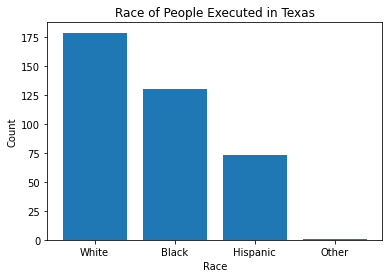

In [17]:
# Your code here; you may want to use multiple code chunks
plt.bar(df["Race"].value_counts().keys(), df["Race"].value_counts())
plt.xlabel("Race")
plt.ylabel("Count")
plt.title("Race of People Executed in Texas")

Text(0.5, 1.0, 'Age of People Executed in Texas')

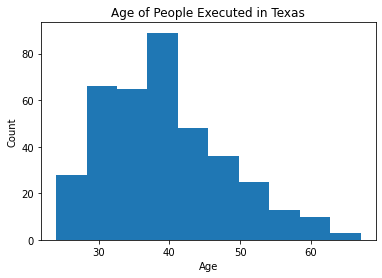

In [23]:
plt.hist(df["Age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age of People Executed in Texas")

Text(0.5, 1.0, 'Previous Crime Committed by Executed People in Texas')

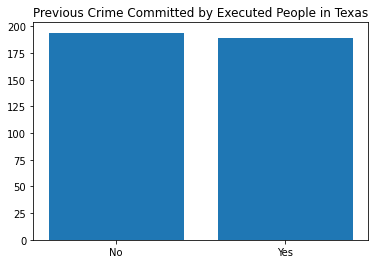

In [27]:
plt.bar(["No", "Yes"], df["PreviousCrime"].value_counts())
plt.title("Previous Crime Committed by Executed People in Texas")

## Statistical Inference

### One mean

Now pick a variable that you can perform statistical inference on a single sample mean using the t-distribution.

In the code block below please respond to all of the following (commented out):

*   What is the variable you chose?
*   How do you know it is appropriate for statistical inference on a single mean using the t-distribution?
*   You'll be asked to contruct and interpret a confidence interval. What is the level of confidence that you'll pick?
*   You'll be asked to perform a hypothesis test.
  *   What are the null and alternative hypotheses?
  *   What is the level of significance?



# Type your responses to the bullet points here
- Age
- There's a wide range of numerical data points with a slightly skewed normal distribution
- 95%
- 
    - null: There is no difference in age for executees with male victims relative to the entire population
    - Alternative: There is a difference in age for executees with male victims relative to the entire population
    - level of significance = .05

#### Confidence Interval

Now construct a confidence interval for your chosen variable at the level of confidence you chose above.

In [37]:
# Type your code for the confidence interval here.
sample = df[df["MaleVictim"]==1].Age.sample(25)
n = 25
x_bar = sample.mean()
s = np.std(sample, ddof=1)
se = s/np.sqrt(n)
conf = stats.t.interval(alpha=0.95, df=n-1, loc=x_bar, scale=se)
conf

(34.714970209951325, 42.48502979004868)

Interpret the confidence interval in the code block below (commented out).

In [ ]:
# Interpret the confidence interval
# The population mean will be within the confidence interval 95% of the time

#### Hypothesis Test

Now perform a hypothesis test for your chosen variable at the level of significance you chose above.

In [39]:
# Type your code for the hypothesis test here.
t_stat, p_value = stats.ttest_1samp(sample, df["Age"].mean())
p_value

0.6848298541328561

Draw the appropriate conclusion for the hypothesis test and justify your answer in the code block below (commented out).

In [ ]:
# Draw the conclusion from the hypothesis test
# We fail to reject the null hypothesis because the p_value is greater than the level of significance

### Two means

Now pick a variable that you can perform statistical inference on two (independent) sample means using the t-distribution.

In the code block below please respond to all of the following (commented out):

*   What are the variables you chose?
*   How do you know it is appropriate for statistical inference on two (independent)means using the t-distribution?
*   You'll be asked to contruct and interpret a confidence interval. What is the level of confidence that you'll pick?
*   You'll be asked to perform a hypothesis test.
  *   What are the null and alternative hypotheses?
  *   What is the level of significance?

# Type your responses to the bullet points here
- number of victims and previous crime
- There are two seperate samples
- 95%
-
    - null: The number of victims has nothing to do with whether they have committed a previous crime or not
    - alternative: The number of victims is related to whether they have committed a previous crime or not
    - level of significance = .05

In [40]:
pc = df[df['PreviousCrime'] == 1]
npc = df[df['PreviousCrime'] == 0]

#### Confidence Interval

Now construct a confidence interval for your chosen variables at the level of confidence you chose above.

In [42]:
# Type your code for the confidence interval here.
sample_pc = pc.NumberVictim.sample(25)
n = 25
x_bar_pc = sample_pc.mean()
s_pc = np.std(sample_pc, ddof=1)
se_pc = s_pc/np.sqrt(n)
conf_pc = stats.t.interval(alpha=0.95, df=n-1, loc=x_bar_pc, scale=se_pc)

sample_npc = npc.NumberVictim.sample(25)
n = 25
x_bar_npc = sample_npc.mean()
s_npc = np.std(sample_npc, ddof=1)
se_npc = s_npc/np.sqrt(n)
conf_npc = stats.t.interval(alpha=0.95, df=n-1, loc=x_bar_npc, scale=se_npc)

conf_pc, conf_npc


((1.1009312551369037, 1.8590687448630963),
 (1.1012858020723226, 1.7787141979276773))

Interpret the confidence interval in the code block below (commented out).

In [ ]:
# Interpret the confidence interval
# The population mean will be within the confidence interval 95% of the time

#### Hypothesis Test

Now perform a hypothesis test for your chosen variable at the level of significance you chose above.

In [44]:
# Type your code for the hypothesis test here.
stats.ttest_ind_from_stats(mean1=x_bar_pc, std1=s_pc, nobs1=n,
                          mean2=x_bar_npc, std2=s_npc, nobs2=n)

Ttest_indResult(statistic=0.16239958858823017, pvalue=0.8716729365508777)

Draw the appropriate conclusion for the hypothesis test and justify your answer in the code block below (commented out).

In [45]:
# Draw the conclusion from the hypothesis test
# We failed to reject the null hypothesis because the pvalue is greater than level of significance

## Summary

Using a multivariate data set, you were able to pick variables to perform one and two sample t confidence intervals and t-tests.